In [1]:
!pip install tensorflow

In [18]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import Sequential

from tensorflow.keras.layers import (Conv2D, MaxPooling2D, Flatten,Dense, Dropout, BatchNormalization)
import os
import keras
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [4]:
dataset = '/kaggle/input/candle-image-data' 
img_s = (128, 128)
batch = 32

In [19]:
###Loading Dataset### &&& ###Augmentation###

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    
    zoom_range=0.1,
    width_shift_range=0.05,
    height_shift_range=0.05,
    validation_split=0.2
)

train_ds = train_datagen.flow_from_directory(
    dataset,
    target_size=img_s,
    batch_size=batch,
    class_mode="binary",
    subset="training"
)

val_ds = train_datagen.flow_from_directory(
    dataset,
    target_size=img_s,
    batch_size=batch,
    class_mode="binary",
    subset="validation"
)

Found 1428 images belonging to 2 classes.
Found 356 images belonging to 2 classes.


**Why vertical flip is not a good augmentation?**

*It is a dataset with price movements so it can flip the up and down trends. Also, it can invert many patterns also.The same can be said for horizontal flip.*


In [14]:

model = Sequential([
    Conv2D(32, (3,3), activation="relu", input_shape=(128,128,3)),
    BatchNormalization(),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation="relu"),
    BatchNormalization(),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation="relu"),
    BatchNormalization(),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation="relu"),
    Dropout(0.5),
    Dense(1, activation="sigmoid")
])


model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [15]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 126, 126, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 61, 61, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 28, 28, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,305,665 (12.61 MB)

 Trainable params: 3,305,217 (12.61 MB)

 Non-trainable params: 448 (1.75 KB)

In [16]:
###Model Training###
EPOCHS =20

history=model.fit(
    train_ds,
    validation_data=val_ds,
    batch_size=batch,
    epochs=EPOCHS,
    validation_split=0.15,

)





/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 53s 1s/step - accuracy: 0.6811 - loss: 1.0779 - val_accuracy: 0.1966 - val_loss: 0.9744
Epoch 2/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 47s 1s/step - accuracy: 0.7919 - loss: 0.5765 - val_accuracy: 0.1966 - val_loss: 1.2061
Epoch 3/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 47s 1s/step - accuracy: 0.7916 - loss: 0.5104 - val_accuracy: 0.2500 - val_loss: 0.8139
Epoch 4/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 47s 1s/step - accuracy: 0.7803 - loss: 0.5612 - val_accuracy: 0.1994 - val_loss: 1.2542
Epoch 5/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 46s 1s/step - accuracy: 0.8073 - loss: 0.4812 - val_accuracy: 0.1938 - val_loss: 1.5213
Epoch 6/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 47s 1s/step - accuracy: 0.7724 - loss: 0.5270 - val_accuracy: 0.2163 - val_loss: 1.4861
Epoch 7/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 46s 1s/step - accuracy: 0.8038 - loss: 0.4585 - val_accuracy: 0.3624 - val_loss: 1.0986
Epoch 8/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 46s 1s/step - accuracy: 0.7773 - loss: 0.4959 - val_accuracy: 0.4579 - val_loss:

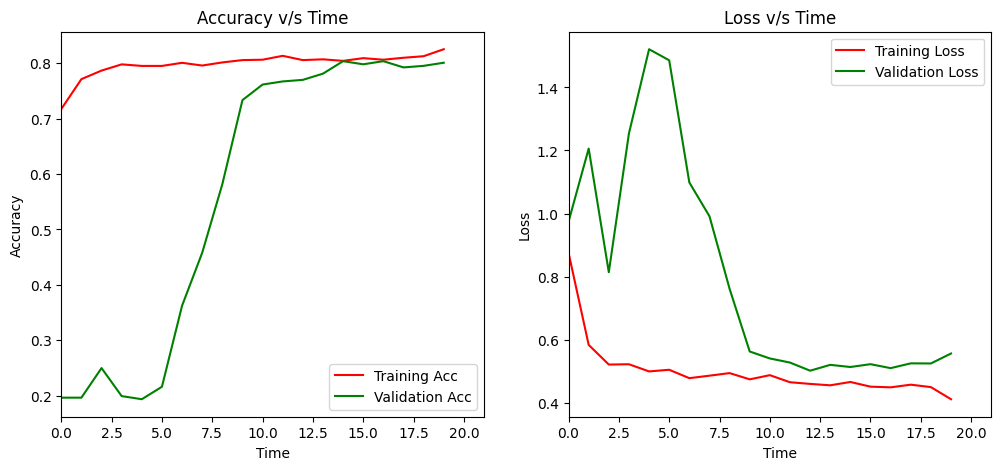

In [17]:
###Plotting###

val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(EPOCHS)

acc = history.history['accuracy']



plt.figure(figsize=(12, 5))


plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Acc',color='red')
plt.plot(epochs_range, val_acc, label='Validation Acc',color='green')
plt.title('Accuracy v/s Time')
plt.xlabel("Time")
plt.ylabel("Accuracy")
plt.xlim(0,21)
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss',color='red')
plt.plot(epochs_range, val_loss, label='Validation Loss',color='green')
plt.title('Loss v/s Time')
plt.xlabel("Time")
plt.ylabel("Loss")
plt.legend()
plt.xlim(0,21)

plt.show()